In [35]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

In [36]:
bank_data = pd.read_csv('./data/bank-full.csv',delimiter=';')
bank_data['poutcome'].value_counts()

poutcome
unknown    36959
failure     4901
other       1840
success     1511
Name: count, dtype: int64

In [37]:
yes = bank_data[bank_data['y'] == 'yes']
no = bank_data[bank_data['y'] == 'no']


y
no     5086
yes    4982
Name: count, dtype: int64


Text(0.9, 5100, '5066')

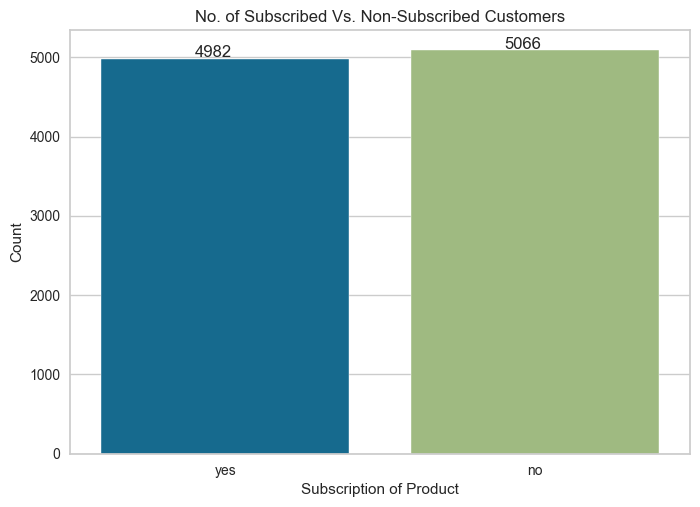

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
no = resample(no,n_samples=5289,replace=False)

final_data = pd.concat([yes,no],axis=0)

#final_data = bank_data
final_data.drop(['default'],axis=1,inplace=True)

final_data = final_data[final_data['poutcome'] != 'other']
print(final_data['y'].value_counts())
final_data = pd.get_dummies(final_data,columns=['job','marital','education','housing','loan','poutcome','month'],drop_first=True)
final_data.drop(['contact'],axis=1,inplace=True)
#final_data['contact'] = final_data['contact'].map({"cellular":1,"telephone":0})
sns.countplot(data=final_data,x='y').set(xlabel='Subscription of Product', ylabel='Count')
plt.title('No. of Subscribed Vs. Non-Subscribed Customers')
plt.text(-0.1,5000,'4982')
plt.text(0.9,5100,'5066')

In [39]:
final_data['y'] = final_data['y'].map({"yes":1,"no":0})
final_data

,age,balance,day,duration,campaign,pdays,previous,y,job_blue-collar,job_entrepreneur,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
83,59,2343,5,1042,1,-1,0,1,False,False,...,False,False,False,False,False,False,True,False,False,False
86,56,45,5,1467,1,-1,0,1,False,False,...,False,False,False,False,False,False,True,False,False,False
87,41,1270,5,1389,1,-1,0,1,False,False,...,False,False,False,False,False,False,True,False,False,False
129,55,2476,5,579,1,-1,0,1,False,False,...,False,False,False,False,False,False,True,False,False,False
168,54,184,5,673,2,-1,0,1,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13309,26,-128,8,392,2,-1,0,0,True,False,...,False,False,False,True,False,False,False,False,False,False
492,36,0,6,337,1,-1,0,0,True,False,...,False,False,False,False,False,False,True,False,False,False
44512,55,10185,11,248,1,180,4,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3672,32,75,16,129,1,-1,0,0,False,False,...,False,False,False,False,False,False,True,False,False,False


Logistic Regression

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, log_loss, accuracy_score
log_dat = final_data
y = log_dat['y']
X = log_dat.drop(['y'],axis = 1)
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state = 100) 
model = LogisticRegression().fit(x_train,y_train)
pred = model.predict(x_test)
pred_ = model.predict(x_train)
print(accuracy_score(y_test,pred))
print(accuracy_score(y_train,pred_))

0.8083416087388282
0.799478519990067


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [41]:
coef_dict = {'features':X.columns,'coefficients':model.coef_.flatten()}
coef_dict = pd.DataFrame.from_dict(coef_dict)
coef_dict = coef_dict.sort_values(by='coefficients',ascending=False)
coef_dict

,features,coefficients
6,previous,0.427093
25,poutcome_success,0.375909
21,education_tertiary,0.182179
11,job_retired,0.173848
36,month_oct,0.136597
33,month_mar,0.128526
37,month_sep,0.091189
29,month_feb,0.083271
14,job_student,0.077733
10,job_management,0.062797


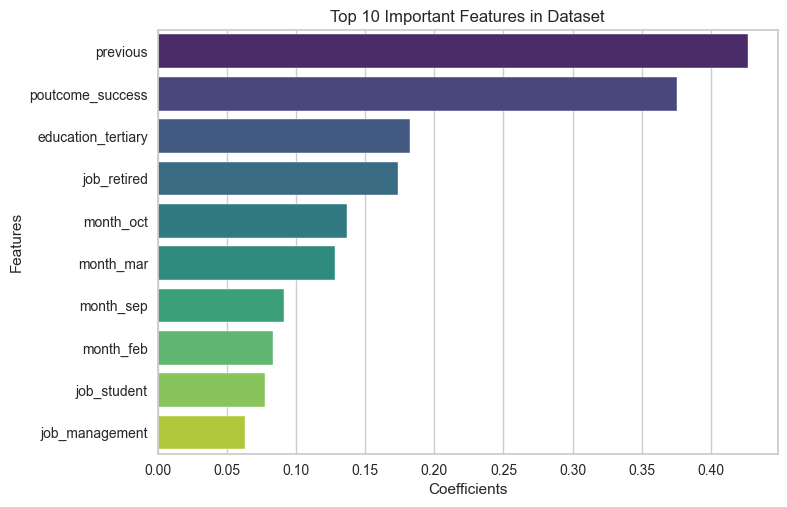

In [42]:
sns.barplot(x=coef_dict['coefficients'][0:10], y=coef_dict['features'][0:10], palette="viridis")
sns.set(rc={'figure.figsize':(10,5)})
plt.xlabel("Coefficients")
plt.ylabel("Features")
plt.title('Top 10 Important Features in Dataset')
plt.savefig('Feature_IMP.pdf',dpi=300)

TOP features of the given model :cons.price.idx	0.224716, cons.conf.idx	0.058833, contact	0.058390, marital_single	0.037037, education_university.degree	0.030154

Confusion Matrix

In [43]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss, balanced_accuracy_score
pred = model.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Sensi : ",sensitivity," Spec : ",specificity)
print("Balanced Acc :",balanced_accuracy_score(y_test,pred))


Sensi :  0.7963525835866262  Spec :  0.8198636806231743
Balanced Acc : 0.8081081321049002


XG Boost

In [44]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, cross_val_score
xb= xgb.XGBClassifier(random_state=1)

# grid searh to choose the best (combination of) hyperparameters
pg_xb={'n_estimators':[100,200,400], 'max_depth':[20,40,50]}

gs_xb=GridSearchCV(estimator= xb,
               param_grid= pg_xb,
               scoring='accuracy',
               cv=2)

# nested cross validation combining grid search (inner loop) and k-fold cv (outter loop)
gs_xb_scores = cross_val_score(gs_xb, X=x_train, y=y_train, cv=5,scoring='accuracy', n_jobs=-1,verbose = 4)

# fit, and fit with best estimator
gs_xb.fit(x_train, y_train)
gs_xb_best=gs_xb.best_estimator_
gs_xb_best.fit(x_train, y_train)

print('Train Accuracy:   {0:.1f}%'.format(gs_xb.score(x_train, y_train)*100))
print('CV Mean Accuracy: {0:.1f}%'.format(np.mean(gs_xb_scores)*100))
print('Test Accuracy:    {0:.1f}%'.format(gs_xb.score(x_test, y_test)*100))


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   42.4s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   47.7s finished


Train Accuracy:   100.0%
CV Mean Accuracy: 84.8%
Test Accuracy:    85.1%


In [45]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81      1027
           1       0.81      0.80      0.80       987

    accuracy                           0.81      2014
   macro avg       0.81      0.81      0.81      2014
weighted avg       0.81      0.81      0.81      2014



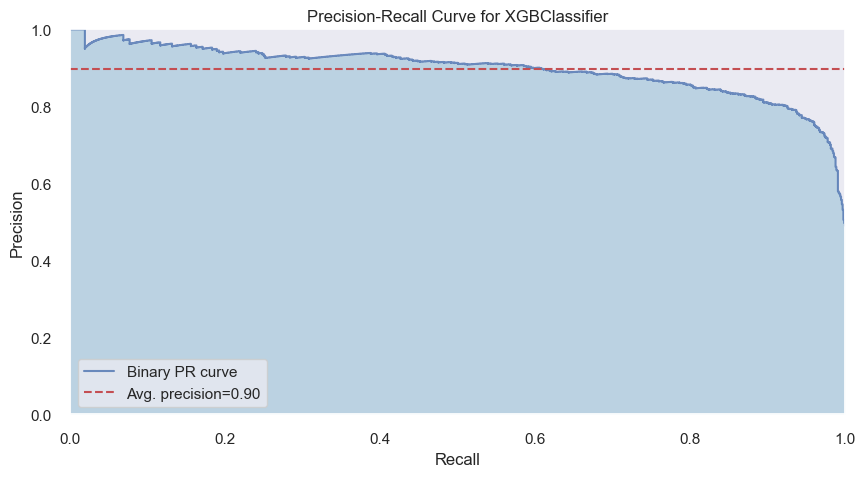

<Axes: title={'center': 'Precision-Recall Curve for XGBClassifier'}, xlabel='Recall', ylabel='Precision'>

In [46]:
from yellowbrick.classifier import ROCAUC, PrecisionRecallCurve, ClassificationReport
from yellowbrick.model_selection import LearningCurve, ValidationCurve, learning_curve
visualizer_pr = PrecisionRecallCurve(gs_xb_best)
visualizer_pr.fit(x_train, y_train)
visualizer_pr.score(x_test, y_test)
visualizer_pr.show()

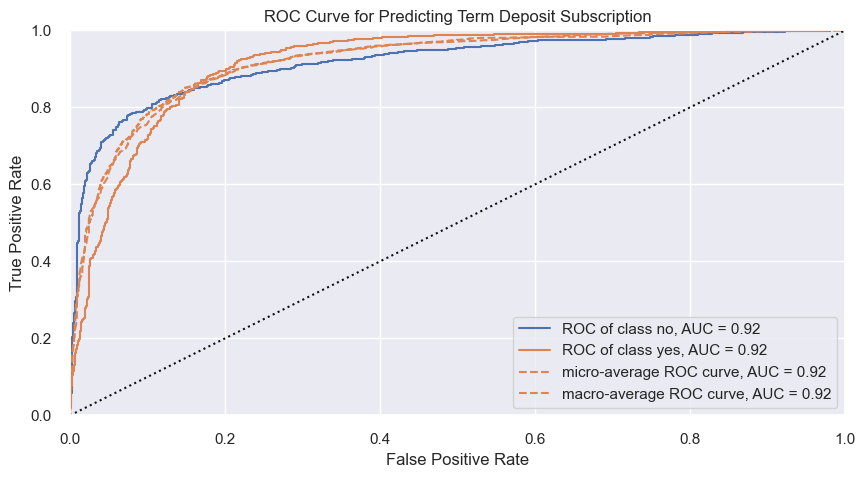

<Axes: title={'center': 'ROC Curve for Predicting Term Deposit Subscription'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [47]:
visualizer_roc = ROCAUC(gs_xb_best, classes=["no", "yes"],title='ROC Curve for Predicting Term Deposit Subscription')
visualizer_roc.fit(x_train, y_train)
visualizer_roc.score(x_test, y_test)
visualizer_roc.show()
visualizer_roc.ax.set_xlabel('False Positive Rate(1-Specificity)')
visualizer_roc.ax.set_ylabel('True Positive Rate(Sensitivity)')
visualizer_roc.show()

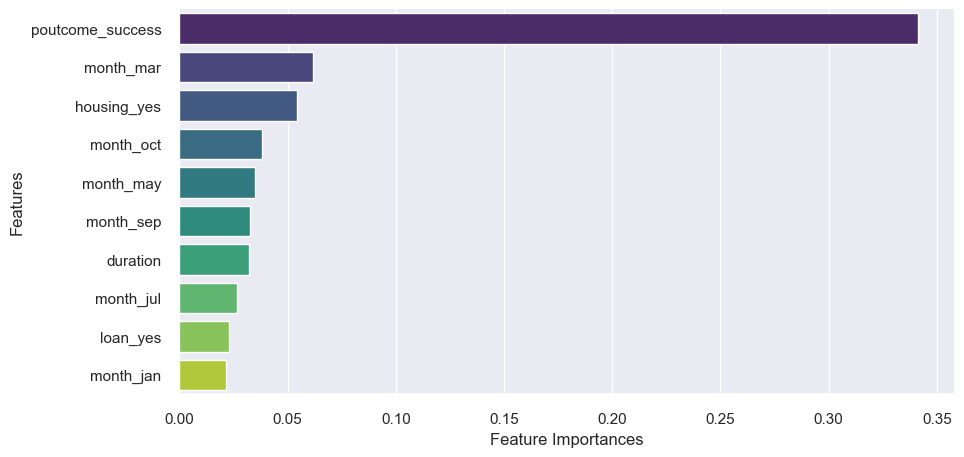

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
importances= gs_xb_best.feature_importances_
feature_importances= pd.Series(importances, index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10], palette="viridis")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()

In [49]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss, balanced_accuracy_score
pred = gs_xb_best.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Sensi : ",sensitivity," Spec : ",specificity)
print("Balanced Acc :",balanced_accuracy_score(y_test,pred))

Sensi :  0.8844984802431611  Spec :  0.818889970788705
Balanced Acc : 0.851694225515933


In [50]:
import shap
shap.initjs()

#high-speed exact algorithm for tree ensemble methods
explainer = shap.TreeExplainer(gs_xb_best)
shap_values = explainer.shap_values(x_train)

ROC Curve

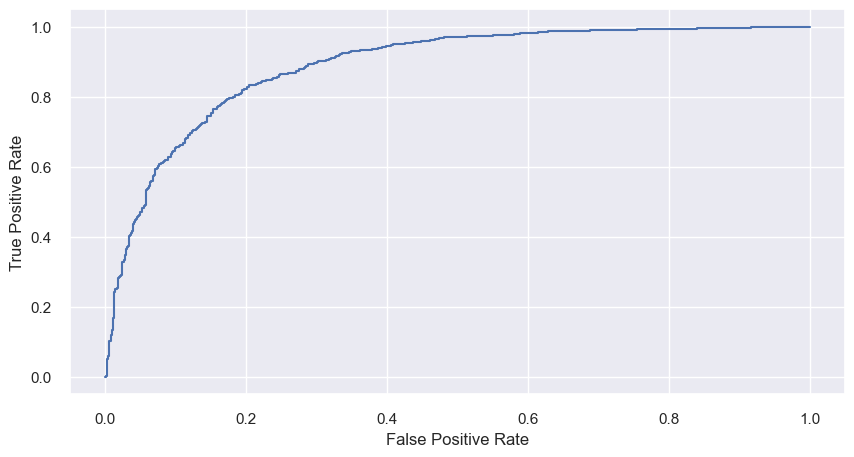

In [51]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
#x = np.linspace(0,1,100)
#y = x
#plt.plot(x, y, '-r', label='y=2x+1')
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

After Scaling the dataset

In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, log_loss, accuracy_score
scal_dat = final_data
y = scal_dat['y']
scal_dat = scal_dat.drop(['y'],axis = 1)
scaler = StandardScaler()
scaler.fit(scal_dat)
scaled = scaler.transform(scal_dat)
x_train,x_test,y_train,y_test = train_test_split(scaled,y, test_size=0.20, random_state = 2) 
model = LogisticRegression().fit(x_train,y_train)
pred = model.predict(x_test)
print(accuracy_score(y_test,pred))

0.814299900695134


Using PCA to reduce features

Text(0, 0.5, 'PC2')

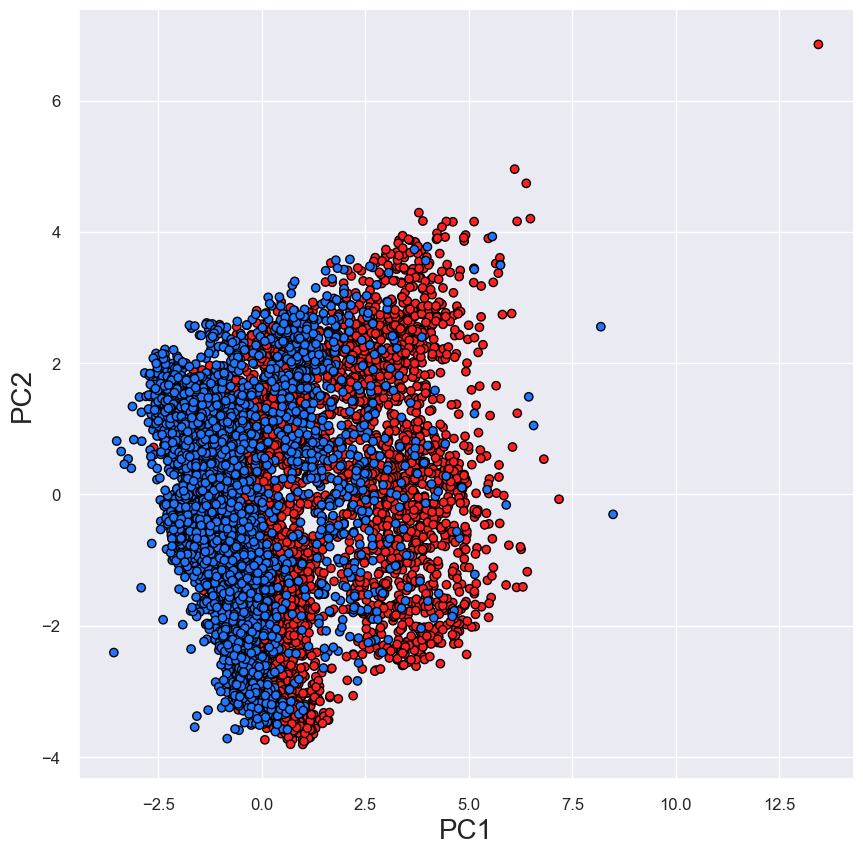

In [53]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
#Scale the data
scaler = StandardScaler()
scaler.fit(final_data)
scaled = scaler.transform(final_data)
pca = PCA().fit(scaled)

pc = pca.transform(scaled)
pc1 = pc[:,0]
pc2 = pc[:,1]

#Plot principal components
plt.figure(figsize=(10,10))

colour = ['#ff2121' if y == 1 else '#2176ff' for y in final_data['y']]
plt.scatter(pc1,pc2 ,c=colour,edgecolors='#000000')
plt.ylabel("Glucose",size=20)
plt.xlabel('Age',size=20)
plt.yticks(size=12)
plt.xticks(size=12)
plt.xlabel('PC1')
plt.ylabel('PC2')


We can visualize that by just using PC1 and PC2, we can fairly evaluate the performance of the model

Text(0, 0.5, 'Proportion of Variance Explained')

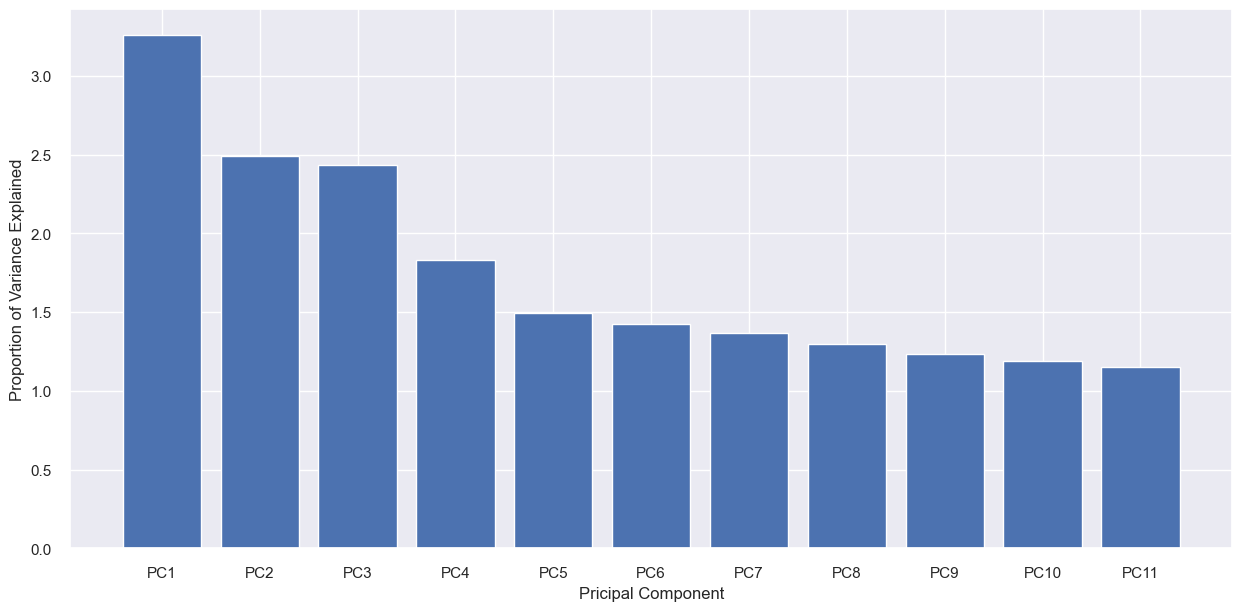

In [54]:
var = pca.explained_variance_[0:11] #percentage of variance explained
labels = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11']

plt.figure(figsize=(15,7))
plt.bar(labels,var,)
plt.xlabel('Pricipal Component')
plt.ylabel('Proportion of Variance Explained')

Higher the Proportion of variance, higher is the predictability power of the given Principal Component

Finding the best amount of Principal Components to get a great accuracy on predicting 'y'

In [55]:
y = final_data['y']
X = final_data.drop(['y'],axis=1)
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.20, random_state = 2) 

In [56]:
from sklearn.decomposition import PCA
import math
mini = 0

for i in range(2,len(x_train.columns)):    
    model_p = PCA(n_components=i)

    X_mod = model_p.fit_transform(x_train)
    X_test_mod = model_p.fit_transform(x_test)
    
    model = LogisticRegression().fit(X_mod,y_train) 
    pred = model.predict(X_test_mod)
    acc = accuracy_score(y_test,pred)
    if acc > mini :
        mini = acc
        flag = i
print("Highest Acc :",mini)
print("The efficient value of M obtained is :",flag)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Highest Acc : 0.7671300893743793
The efficient value of M obtained is : 17


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [57]:
model_p = PCA(n_components=flag)
PCA_train = model_p.fit_transform(x_train)
PCA_test = model_p.fit_transform(x_test)

In [58]:
PCA_train

array([[-1.46790639e+03, -3.22280303e+02, -4.67486546e+01, ...,
         8.54804149e-01, -9.25537595e-02,  1.41900511e-01],
       [-1.52853979e+03, -4.62114755e+01, -4.40578727e+01, ...,
         1.09265576e-01,  4.51183177e-01,  8.74227778e-02],
       [-1.51895932e+03, -3.56226554e+02, -4.72507640e+01, ...,
        -5.17750271e-01,  3.42130130e-02,  5.05244111e-01],
       ...,
       [-1.22671633e+03, -1.77620787e+02, -4.56380097e+01, ...,
        -2.29693467e-01, -1.26011586e-01,  1.57316859e-02],
       [-1.06577415e+03,  5.21139327e+02, -3.89116601e+01, ...,
        -8.84505772e-02, -1.23263523e-01,  4.82411431e-02],
       [-6.79463469e+02,  9.64638776e+00, -4.41170847e+01, ...,
         3.30191400e-01, -2.53412426e-02, -3.27878154e-02]])

Using Decision Tree Regressor to find important features

In [59]:
import numpy as np
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
model_en = BaggingRegressor(base_estimator=DecisionTreeRegressor()).fit(x_train,y_train)
pred = model_en.predict(x_test)
pred = np.array(pred)
pred = [int(x) for x in pred]
x_train
#feature_importances_ = np.mean([tree.feature_importances_ for tree in model_en.estimators_],axis=0)
#feature_importances_


`base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.


,age,balance,day,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
20972,43,64,14,55,2,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
31030,31,3,11,331,1,-1,0,False,False,False,...,False,True,False,False,False,False,False,False,False,False
18232,26,13,30,21,25,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
44290,37,387,26,128,2,419,1,False,False,False,...,False,False,False,True,False,False,False,False,False,False
13545,38,327,9,556,5,-1,0,False,False,False,...,False,False,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22846,44,792,25,630,7,-1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
38089,59,422,14,647,4,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
7815,32,305,30,200,3,-1,0,False,False,False,...,False,False,False,False,False,False,True,False,False,False
38765,37,465,18,899,3,-1,0,False,False,True,...,False,False,False,False,False,False,True,False,False,False


In [60]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': range(1,101)}
model_cv_rand = GridSearchCV(RandomForestClassifier(),param_grid=params,verbose = 4).fit(x_train,y_train)
model_cv_rand.best_estimator_

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV 1/5] END ....................n_estimators=1;, score=0.716 total time=   0.0s
[CV 2/5] END ....................n_estimators=1;, score=0.728 total time=   0.0s
[CV 3/5] END ....................n_estimators=1;, score=0.749 total time=   0.0s
[CV 4/5] END ....................n_estimators=1;, score=0.752 total time=   0.0s
[CV 5/5] END ....................n_estimators=1;, score=0.765 total time=   0.0s
[CV 1/5] END ....................n_estimators=2;, score=0.719 total time=   0.0s
[CV 2/5] END ....................n_estimators=2;, score=0.735 total time=   0.0s
[CV 3/5] END ....................n_estimators=2;, score=0.727 total time=   0.0s
[CV 4/5] END ....................n_estimators=2;, score=0.727 total time=   0.0s
[CV 5/5] END ....................n_estimators=2;, score=0.746 total time=   0.0s
[CV 1/5] END ....................n_estimators=3;, score=0.801 total time=   0.0s
[CV 2/5] END ....................n_estimators=

RandomForestClassifier(n_estimators=53)

In [61]:
from sklearn.metrics import confusion_matrix, classification_report, log_loss, balanced_accuracy_score
rf_model = RandomForestClassifier(n_estimators=49).fit(x_train,y_train)
pred_ = rf_model.predict(x_train)
pred = rf_model.predict(x_test)
print("Training Acc : ",accuracy_score(y_train,pred_)," Testing Acc : ",accuracy_score(y_test,pred))
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)
print("Sensi : ",sensitivity," Spec : ",specificity)
print("Balanced Acc :",balanced_accuracy_score(y_test,pred))

Training Acc :  0.9995033523714925  Testing Acc :  0.8465739821251241
Sensi :  0.8623115577889447  Spec :  0.831207065750736
Balanced Acc : 0.8467593117698404


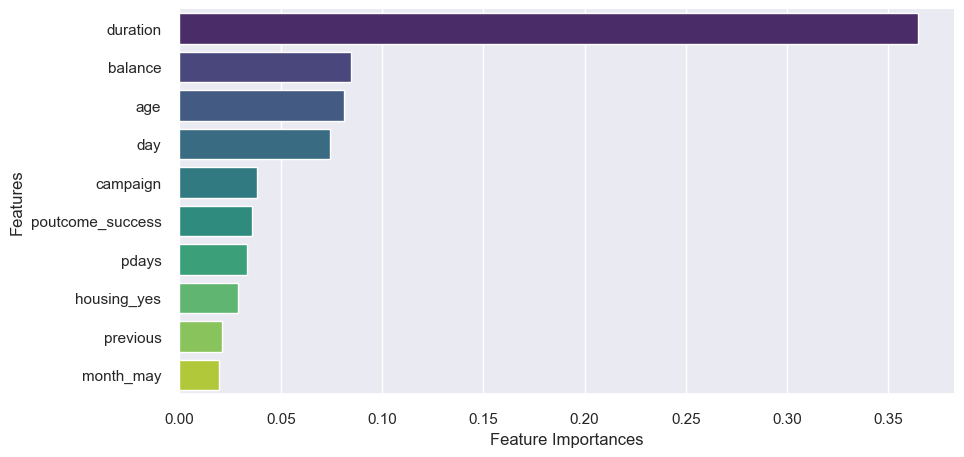

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt
importances= rf_model.feature_importances_
feature_importances= pd.Series(importances, index=x_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_importances[0:10], y=feature_importances.index[0:10], palette="viridis")
sns.despine()
plt.xlabel("Feature Importances")
plt.ylabel("Features")
plt.show()